# Unshuffle a sequence of frames 

This notebook is intended to xx. 

1. Preperation of the data for analysis
2. Analysis code 
3. Testing and validation


## Get data

In [ ]:
from PIL import Image, ImageSequence

with Image.open("./data/race_horse.gif") as gif:
    index = 1
    for frame in ImageSequence.Iterator(gif):
        frame.save(f"frame_{index}.png")
        index += 1

## Load and display sequences 
This is meant to prepare the data for the analysis. This includes loading in the movie, shuffling and then displaying them. 



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import itertools

%matplotlib inline

In [227]:
def load_image(filename):
    """Load an image and save it as an array."""
    img = Image.open(filename).convert("RGB")
    return np.array(img)

def load_sequence(folder):
    """Load a sequence of frames."""
    output = {}
    for f in os.listdir(folder):
        if f.endswith(".png"):
            output[int(f[6:-4])] = load_image(os.path.join(folder,f))
    return output

def shuffle(sequence, seed_value=42):
    """Randomly shuffle a sequence of numbers."""
    np.random.seed(seed_value)
    return np.random.permutation(sequence)

def load_sequence_and_shuffle(folder, frame1 = True):
    """shuffle xxx"""
    output = {}
    seq = load_sequence(folder)
    iseq = [*seq]
    new_iseq = shuffle(iseq)
    for i, k in enumerate(new_iseq):
        output[i] = seq[k]
    return output
    
# Load the data:
data_folder = "./data/race_horse/"
sequence = load_sequence(data_folder)
shuffled_sequence = load_sequence_and_shuffle(data_folder)
# Make a copy of the gif in case it is overwritten

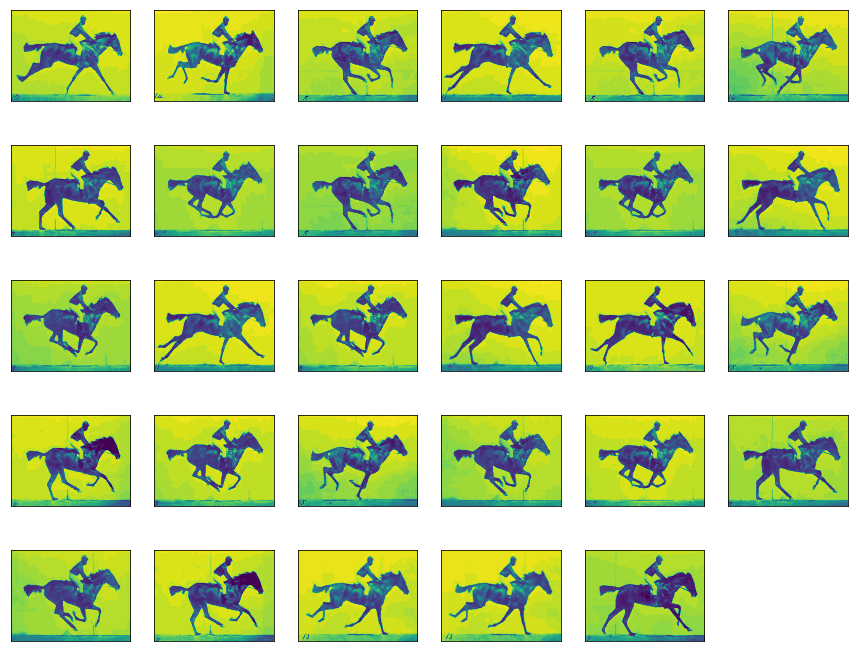

In [233]:
def plot_sequence(sequence):
    """Display sequence in a grid"""
    fig = plt.figure(figsize=(15,12))
    for i in range(1, 30):
        ax = fig.add_subplot(5, 6, i)
        ax.imshow(sequence[i][:,:,0])
        #ax.set_title(f"i = {}")
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)



def play_sequence(sequence):
    """Display sequence as a movie"""
    return None

plot_sequence(shuffled_sequence)

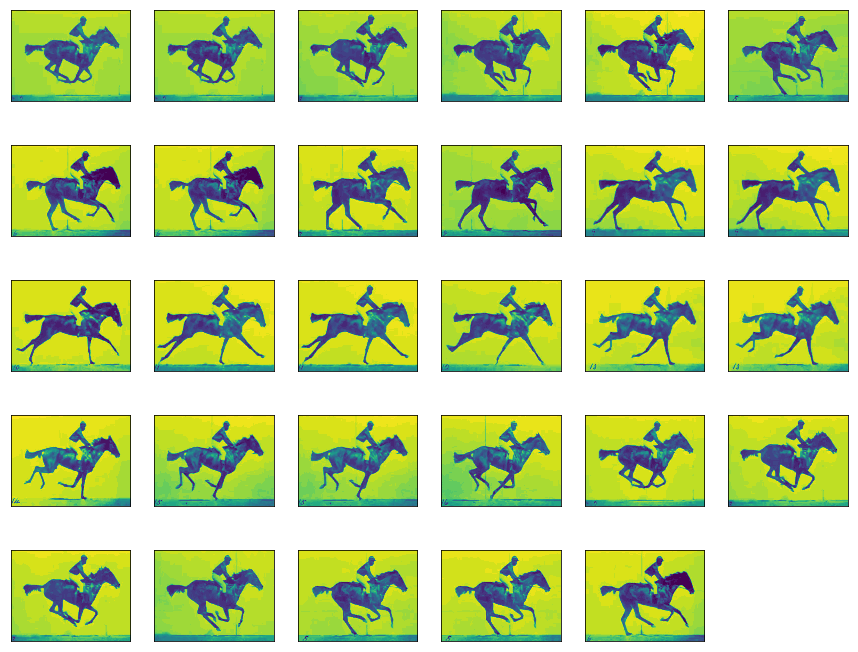

In [234]:
plot_sequence(sequence)

**Figure:** An example that has been shuffled for this analysis. 

## Next, compare images of sequence
An interesting question is how do we calculate the similarity between two images. 

In [223]:
def mean_pixel_difference(arr1, arr2):
    """For now only works with single channel"""
    return np.mean(arr1-arr2)

similarity0 = {} # similarity calculated in red channel 
iseq = np.arange(1,30) 
pairs = list(itertools.combinations(iseq,2)) # Avoids duplicate comparisons 

for i in iseq:
    similarity0[i] = {}

for p in pairs:
    i1,i2 = p
    arr1 = sequence[i1][:,:,0]
    arr2 = sequence[i2][:,:,0]
    similarity0[i1][i2] = mean_pixel_difference(arr1,arr2)

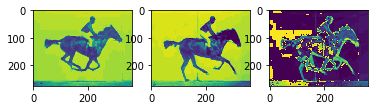

In [176]:
def mean_pixel_distance(arr1, arr2):
    """For now only works with single channel"""
    return np.mean(arr1-arr2, axis=(0,1))





f, ax = plt.subplots(1,3)
ax[0].imshow(image1[:,:,0])
ax[1].imshow(image2[:,:,0])
ax[2].imshow(image1[:,:,0]-image2[:,:,0])

In [224]:
similarity0[1]

{2: 5.6394021739130435,
 3: 40.736634460547506,
 4: 89.92017914653785,
 5: 89.1634963768116,
 6: 37.374315619967795,
 7: 57.26930354267311,
 8: 57.084782608695654,
 9: 63.46127214170692,
 10: 45.87313808373591,
 11: 76.00743760064412,
 12: 75.76845813204508,
 13: 87.30444847020934,
 14: 117.86282206119162,
 15: 117.52189009661836,
 16: 57.08967391304348,
 17: 59.842814009661836,
 18: 59.70450885668277,
 19: 45.605776972624795,
 20: 51.93942230273752,
 21: 51.80359299516908,
 22: 46.18928140096618,
 23: 24.87642914653784,
 24: 42.03967391304348,
 25: 42.47487922705314,
 26: 87.73089774557165,
 27: 37.38867753623188,
 28: 37.411745169082124,
 29: 57.310980273752016}

In [184]:
from scipy.spatial.distance import cdist

cdist(image1,image2)**2


ValueError: XA must be a 2-dimensional array.

## Calculating similarity

To speed up the analysis, we start by comparing images for a single color channel. 

Afterwards, we repeat the analysis on the remaining channels. We´ll end up with three new sequences, ordered using information from their corresponding channel. 


In [ ]:
new_sequence = {} # keys: r,b,g
for i in sequence:
    print()

In [ ]:
def ssm(arr):
    return 



In [ ]:
for 